# Desafío - Análisis de ventas y rendimiento de las tiendas

El objetivo de este desafío es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaremos cuál de estas cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la decisión de cuál de estas cuatro tiendas debe vender para invertir en un nuevo negocio.

Te han contratado para realizar este análisis. Tu jefe te ha pedido que hagas la evaluación basándose en estos cinco aspectos:

1. Facturación total de cada tienda, es decir, cuál tienda vende más. 
2. Cuáles son las categorías más populares de cada tienda, es decir, cuáles productos se venden más en cada tienda?
3. Cuál es el promedio de evaluación de cada uno de los clientes?
4. Cuáles son los productos más y menos vendidos en cada tienda?
5. Cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes?

Con estos datos, ayudara al señor Juan a tomar una decisión fundamental y estratégica.

### Importación de la base de datos

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy

In [23]:
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib.ticker as ticker;
import numpy as np;

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Estructura de datos:
El conjunto de datos incluye la siguiente información:

`Producto y Categoría`: Artículos vendidos y sus calificaciones.

`Precio y Envío`: Valores de venta y costos asociados.

`Fecha y ubicación de compra`: Información temporal y geográfica.

`Evaluación de compra`: Comentarios de clientes.

`Tipo de Pago y Cuotas`: Métodos utilizados por los clientes.

`Coordenadas Geográficas`: Ubicación de las transacciones.

## 1. Análisis de facturación:

En este primer análisis, debemos calcular el ingreso total de cada tienda. Sumando los valores de la columna `Precio` de cada conjunto de datos de la tienda para estimar los ingresos.

- Ingresos totales por tienda:

In [16]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

for store in stores:
    sum_stores.append(store['Precio'].sum());

print(f"Ingreso Total Tienda 1: {sum_stores[0]:,.2f}")
print(f"Ingreso Total Tienda 2: {sum_stores[1]:,.2f}")
print(f"Ingreso Total Tienda 3: {sum_stores[2]:,.2f}")
print(f"Ingreso Total Tienda 4: {sum_stores[3]:,.2f}")

Ingreso Total Tienda 1: 1,150,880,400.00
Ingreso Total Tienda 2: 1,116,343,500.00
Ingreso Total Tienda 3: 1,098,019,600.00
Ingreso Total Tienda 4: 1,038,375,700.00


- Promedio de los ingresos totales de las 4 tiendas:

In [19]:
promedio_ingresos = np.mean(sum_stores);
print(f"Promedio de Ingresos Totales: {promedio_ingresos:,.2f}")

Promedio de Ingresos Totales: 1,100,904,800.00


- Gráfica de los ingresos totales de las tiendas respecto a a su promedio:

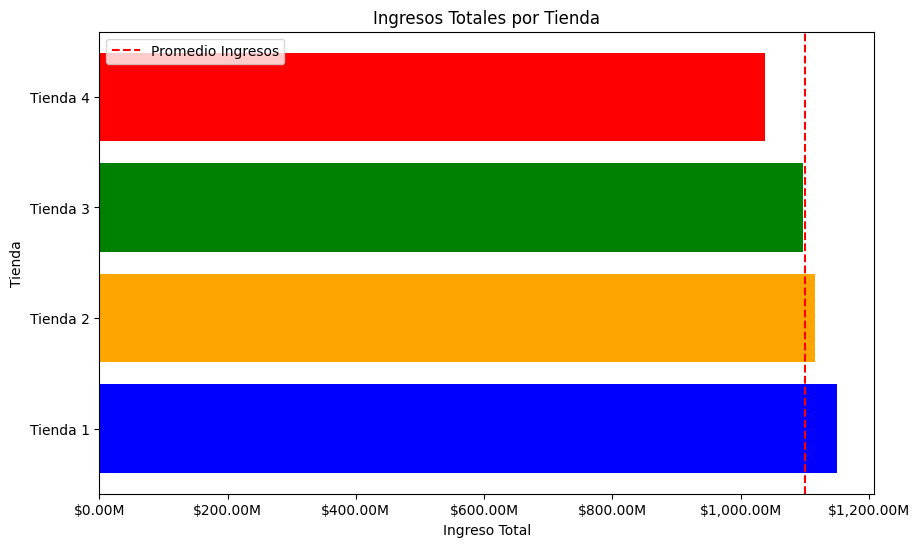

In [28]:
plt.figure(figsize=(10, 6));
plt.axvline(promedio_ingresos, color='red', linestyle='--', label='Promedio Ingresos');
plt.legend();
plt.title('Ingresos Totales por Tienda');
plt.ylabel('Tienda');
plt.xlabel('Ingreso Total');
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6));
plt.gca().xaxis.set_major_formatter(escalax);
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores, color=['blue', 'orange', 'green', 'red']);


### En conclusión:

In [30]:
print(f"La tienda con mayor ingreso es la Tienda {sum_stores.index(max(sum_stores)) + 1} con un ingreso total de ${max(sum_stores):,.2f}.");
print(f"Y la tienda con menor ingreso es la Tienda {sum_stores.index(min(sum_stores)) + 1} con un ingreso total de ${min(sum_stores):,.2f}.");

La tienda con mayor ingreso es la Tienda 1 con un ingreso total de $1,150,880,400.00.
Y la tienda con menor ingreso es la Tienda 4 con un ingreso total de $1,038,375,700.00.


## 2. Ventas por categoría:

En este punto debemos calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

## 3. Calificación promedio de la tienda:

## 4. Productos más y menos vendidos:

## 5. Envío promedio por tienda: